# Gradient Descent 의 단점 해결 방안들에 대해 알아보겠습니다.

## 오늘 다룰 내용은 SGD, SGD with momentum, AdaGrad, RMSprop, Adam입니다.


In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

 우선 함수는 아래와 같이 주어집니다. 

In [2]:
def f(x):
    return x[0]**2/20 + x[1]**2

위 함수의 최소값과 최소값을 만드는 입력값은 무엇입니까?

정답)최소값을 만드는 입력값은 x[0] = 0, x[1] = 0, 최댓값은 존재x

위 함수의 3D wireframe과 2D Contour를 그리는 함수를 완성합니다.

In [3]:
def plot_points_on_contour(f,points=None):
    fig = plt.figure(figsize=(15,5))

    ax1 = fig.add_subplot(121, projection='3d')
    ax2 = fig.add_subplot(122)

    x = [np.linspace(-10,10,100), np.linspace(-10,10,100)]

    X = np.meshgrid(x[0],x[1])
    Z = f(X)


    # Plot a basic wireframe.
    ax1.plot_wireframe(X[0], X[1], Z)
    ax1.view_init(30,200)
    
    ax2.contour(X[0],X[1],Z,30)

    if points is not None:
        ax2.plot(points[0], points[1], color='#1f77b4',
         marker='o', linestyle='-')
    
    plt.show()

함수 f만 입력시 wireframe과 contour 그림이 출력됩니다.

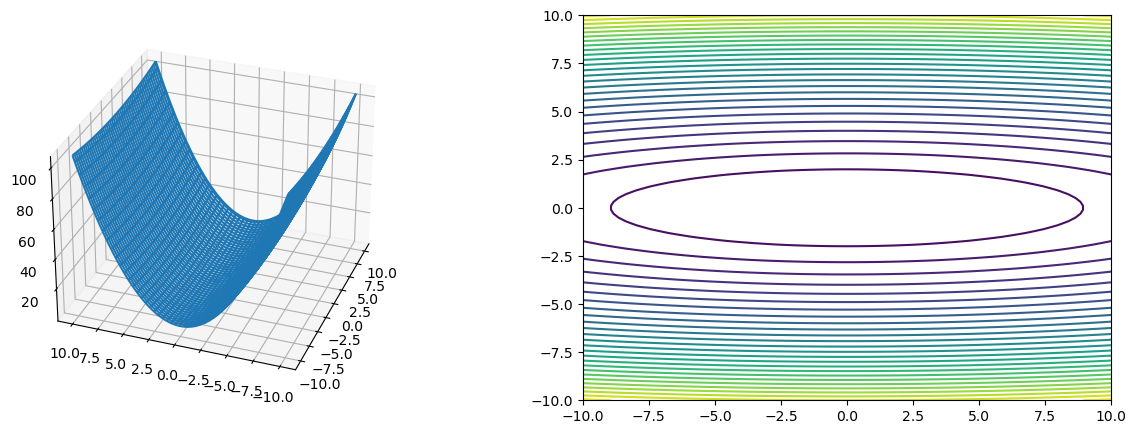

In [4]:
plot_points_on_contour(f)

함수와 각 점의 x,y축을 입력하면 그 부분이 contour 그림에 표시됩니다.

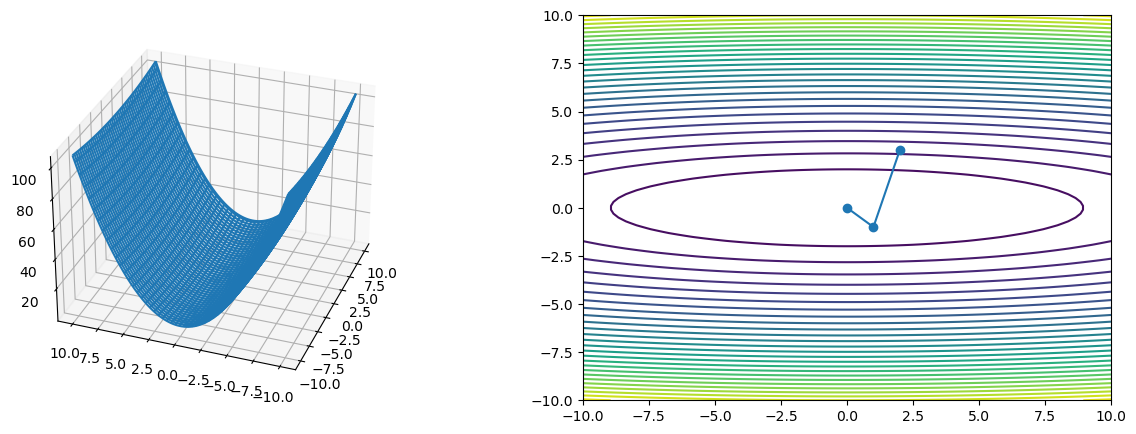

In [5]:
plot_points_on_contour(f, [[0,1,2],[0,-1,3]])

## 각가의 방식으로 주어진 함수를 최소로 만드는 x,y값을 찾아봅시다.

즉 위에서 계산한 입력값 x,y를 각 방법으로 찾을 수 있어야 합니다. 

아래 함수 GD는 함수, torch.Tensor 객체, learning_rate, num_step 를 입력으로 받아 3D wireframe과 2D contour에 x값이 어떻게 변화는지를 표시하여줍니다.

In [6]:
def GD(f,init_x, learning_rate, num_step):

    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        init_x.requires_grad = True
        loss = f(init_x)
        loss.backward()

        with torch.no_grad():
            init_x -= learning_rate * init_x.grad
            
            init_x.grad.zero_()

            # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])
    

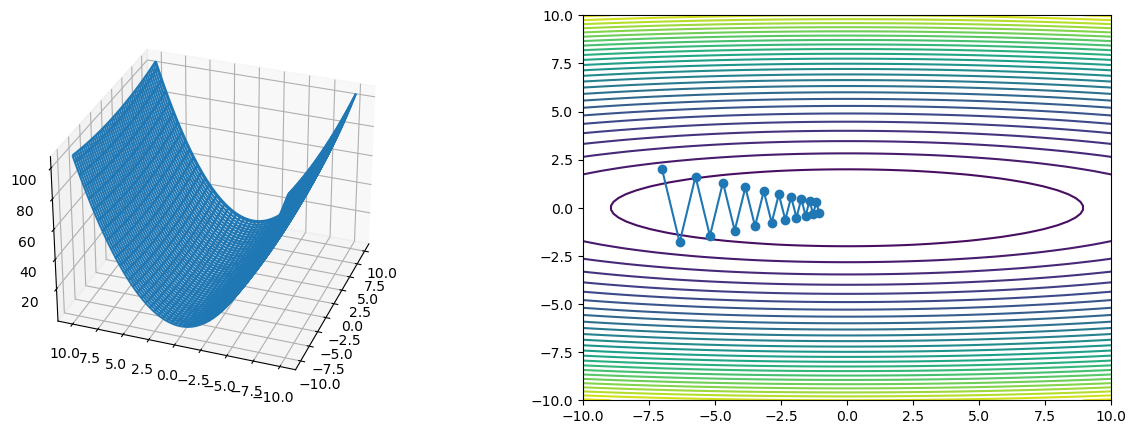

In [7]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD(f,x,.95, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) learning_rate 줄이면 최적화 과정이 느려지고 늘리면 최적화 경로가 불안정. 초기값을 변곃아면 시작점이 달라져서 수렴 속도가 달라짐

아래 함수 GD_momentum는 함수, torch.Tensor 객체, learning_rate, num_step, momentum 계수를 입력으로 받아 3D wireframe과 2D contour에 x값이 어떻게 변화는지를 표시하여줍니다.

In [8]:
def GD_momentum(f, init_x, learning_rate, num_step, mom):

    v = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        init_x.requires_grad = True
        loss = f(init_x)
        loss.backward()

        with torch.no_grad():
            v = mom * v + learning_rate * init_x.grad
            init_x -= v

            # gradient를 초기화
            init_x.grad.zero_()
         
            # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])
    

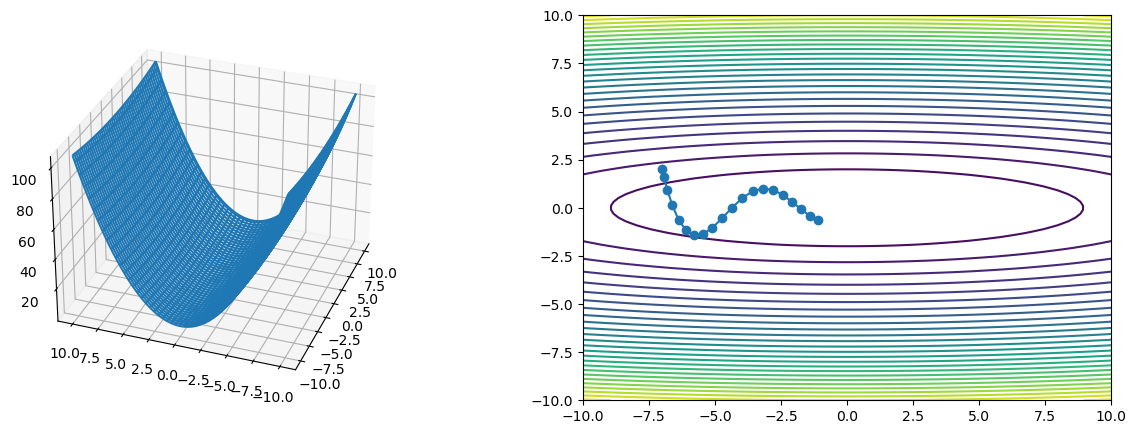

In [9]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_momentum(f,x,.1, 20, 0.9)

 위 결과에 learning_rate와 초기값, 모멘텀 계수을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습률이 크면 최적화 과정이 불안정, 작으면 느려짐. 초기값은 시작점을 결정해 수렴 속도와 최적화 경로에도 영향을 미침. 모멘텀 계수는 최적화 과정에서 현재 이동 방향을 결정해서 안정성과 속도에 영향을 미침


In [10]:
def GD_AdaGrad(f, init_x, learning_rate, num_step):

    h = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        init_x.requires_grad = True
        loss = f(init_x)
        loss.backward()


        with torch.no_grad():
            # 그래디언트의 제곱을 h에 누적
            h += init_x.grad ** 2
            # 그래디언트를 조정한 후 파라미터 업데이트
            init_x -= learning_rate * init_x.grad / torch.sqrt(h)

            # gradient를 초기화
            init_x.grad.zero_()
         
            # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

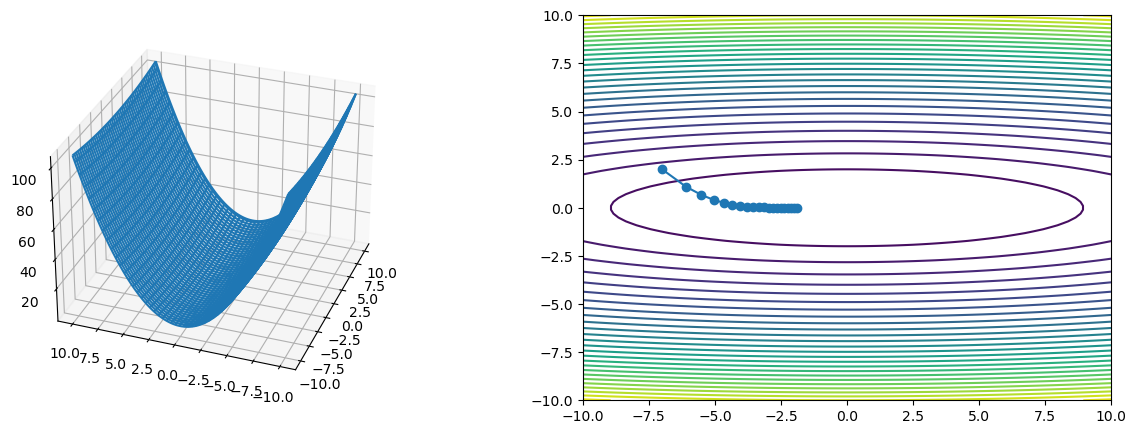

In [11]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_AdaGrad(f,x,.9, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습률을 크게 하면 발산, 작게 하면 시간 오래걸림. 초기값은 초기값이 최소값에 더 가까울수록 최소값에 수렴하는 속도가 빨라짐.


In [12]:
def GD_RMSprop(f,init_x, learning_rate, num_step, gamma):

    g = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        init_x.requires_grad = True
        loss = f(init_x)
        loss.backward()


        with torch.no_grad():
            # 이동 평균을 사용해 그래디언트 제곱을 계산
            g = gamma * g + (1 - gamma) * (init_x.grad ** 2)
            # 그래디언트를 조정한 후 파라미터 업데이트
            init_x -= learning_rate * init_x.grad / torch.sqrt(g)

            # gradient를 초기화
            init_x.grad.zero_()

         
           # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

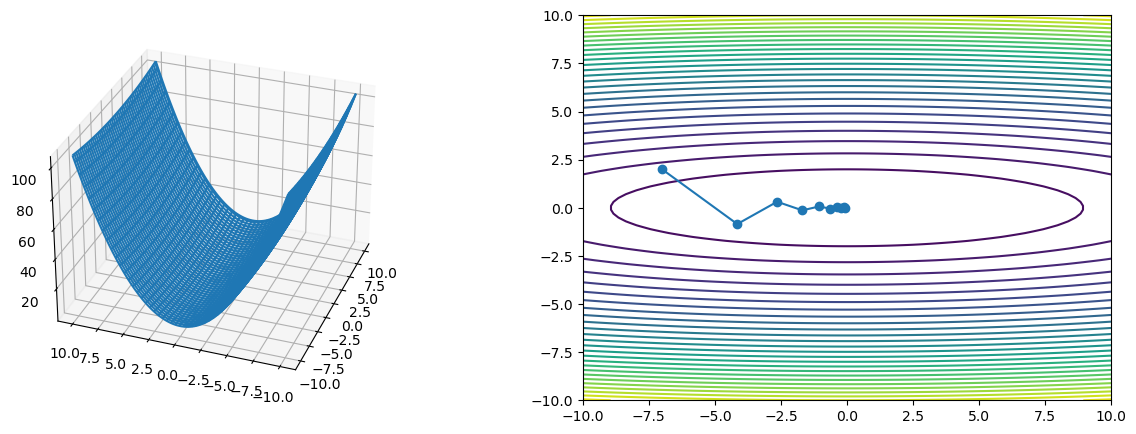

In [13]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_RMSprop(f,x,.9, 10, 0.9)


 위 결과에 learning_rate와 초기값, gamma 을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

In [14]:
def GD_Adam(f,init_x, learning_rate, num_step, beta_1, beta_2):

    m = 0
    v = 0
    x_rlt = []
    y_rlt = []

    for i in range(num_step):

        x_rlt.append(init_x[0].item())
        y_rlt.append(init_x[1].item())

        # loss 함수를 정의하고 미분하시오
        init_x.requires_grad = True
        loss = f(init_x)
        loss.backward()


        with torch.no_grad():
            m = beta_1 * m + (1 - beta_1) * init_x.grad
            v = beta_2 * v + (1 - beta_2) * (init_x.grad ** 2)
            m_hat = m / (1 - beta_1 ** (i + 1))
            v_hat = v / (1 - beta_2 ** (i + 1))
            init_x -= learning_rate * m_hat / torch.sqrt(v_hat)
            init_x.grad.zero_()
         
            # 채우시오

        init_x.requires_grad = True

    plot_points_on_contour(f, [x_rlt,y_rlt])

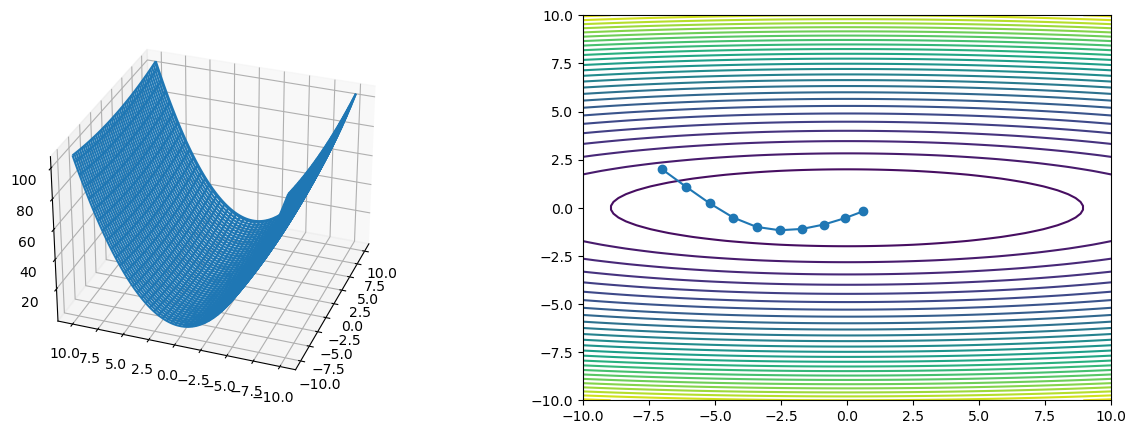

In [15]:
x = torch.tensor([-7,2], requires_grad = True, dtype=torch.float32)

GD_Adam(f,x,0.9, 10, 0.9, 0.9)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답)learning-rate가 커지면 빠르게 최적해 도달, 과하면 지나침. 작아지면 시간이 걸리지만 안정적. 초기값이 최적점에 가까우면 더빠르게 학습. 


## 새로운 함수에 대해 위 작업을 반복해보자

In [16]:
def g(x):
    return x[0]**4 + x[1]**4 + 5*x[0]**3  - 40*(x[0]-1)**2 - 40*(x[1]-1)**2

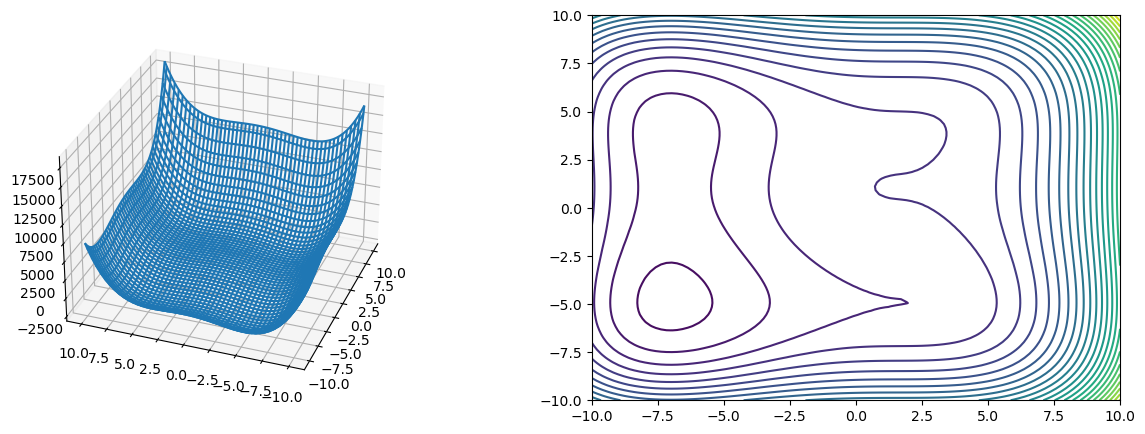

In [17]:
plot_points_on_contour(g)

위 함수의 최소값를 갖는 입력값은 대략 어디인가?

## 정답)  대략(1.5,1.5)

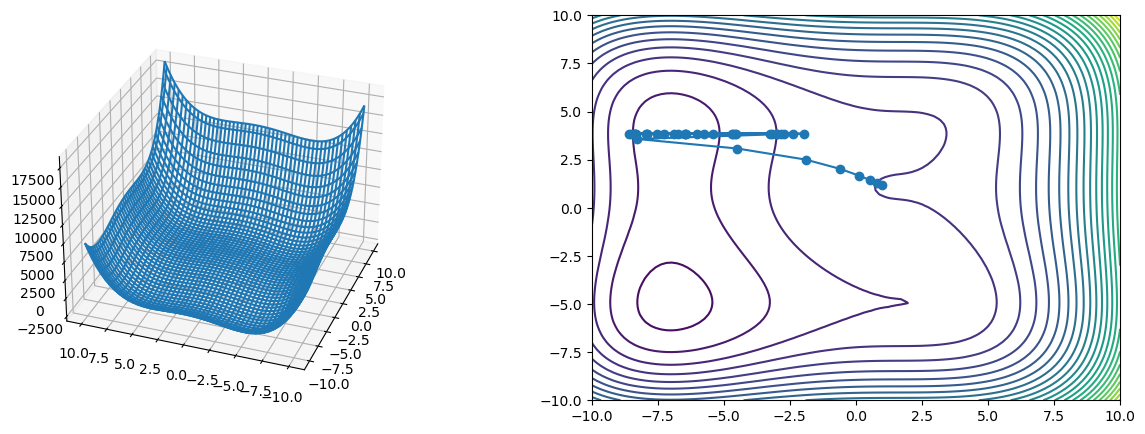

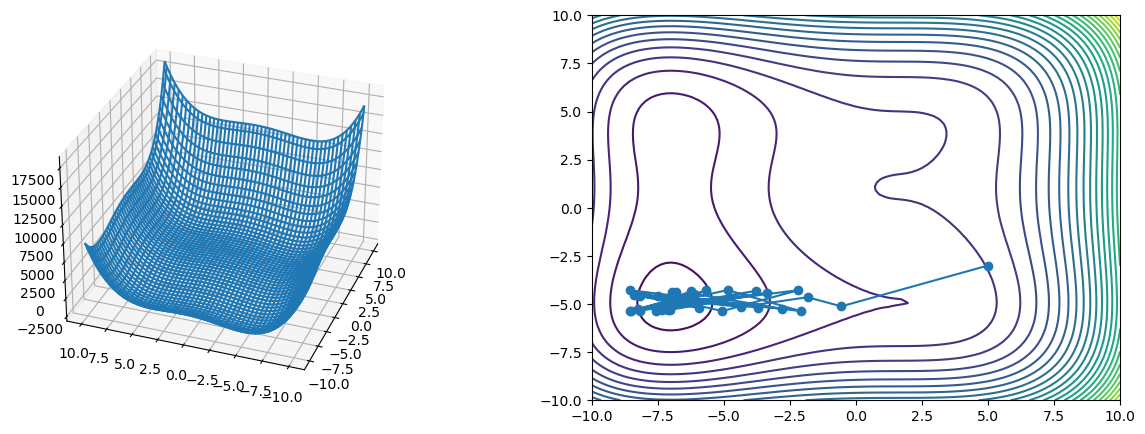

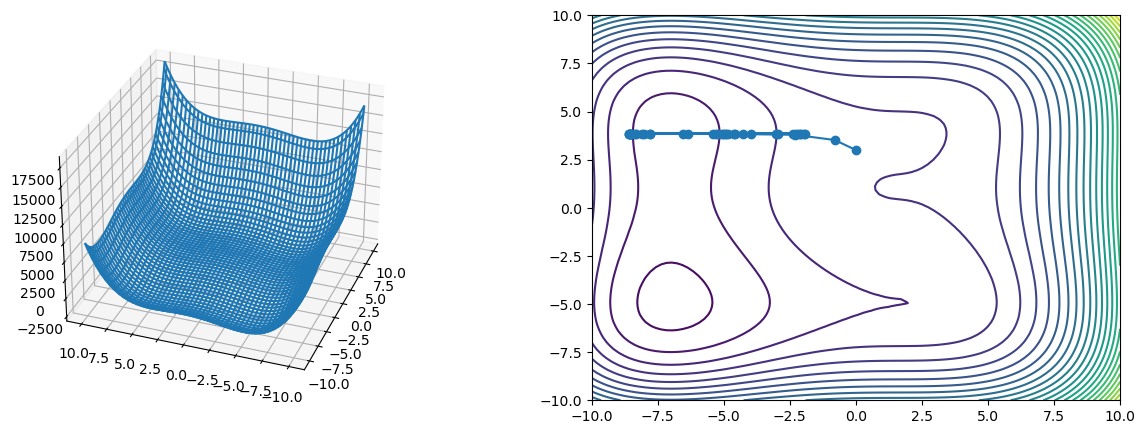

In [18]:
x = torch.tensor([1,1.2], requires_grad = True, dtype=torch.float32)

GD(g, x, 0.01, 40)# 채우시오)

x = torch.tensor([5,-3], requires_grad = True, dtype=torch.float32)

GD(g, x, 0.01, 30)# 채우시오)

x = torch.tensor([0,3], requires_grad = True, dtype=torch.float32)

GD(g, x, 0.01, 40)# 채우시오)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습률 적으면 더 안정적. 초기값은 최솟값 주변에 위치하는 값으로 설정하면 빠르게 수렴해 학습함


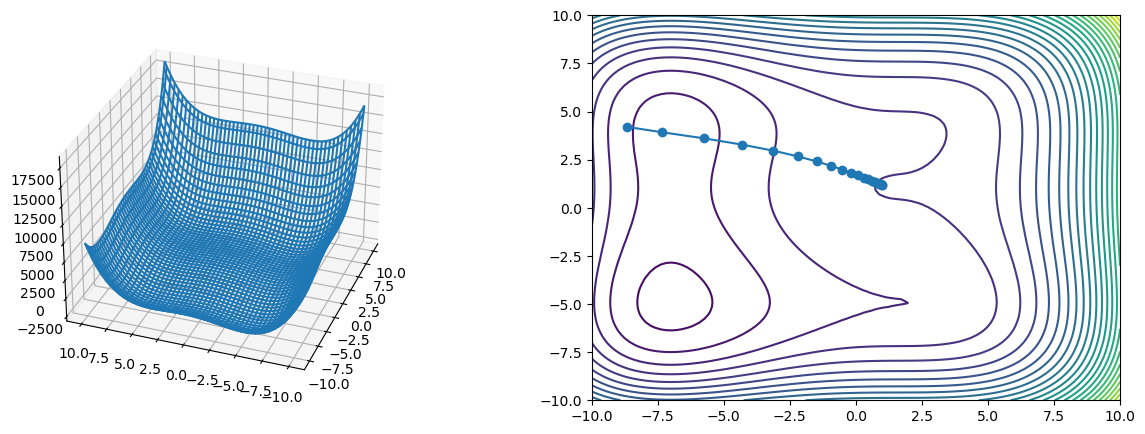

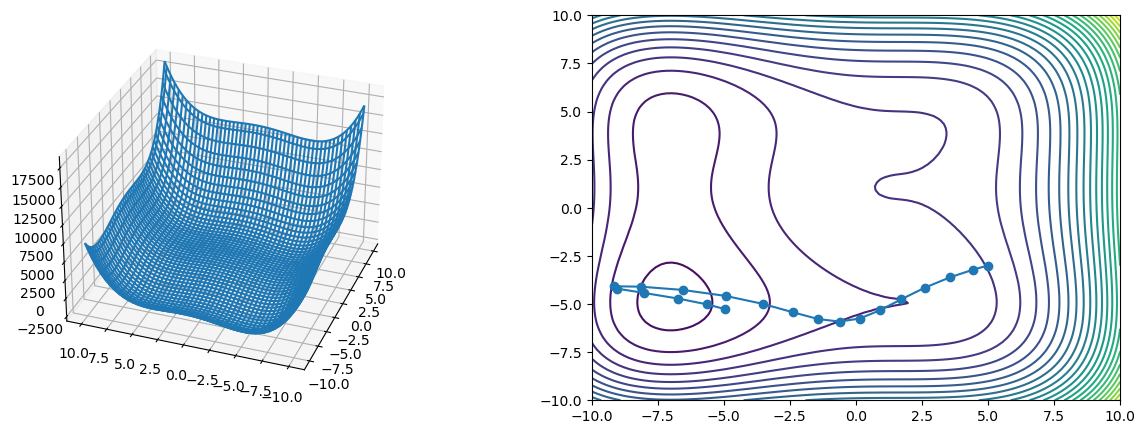

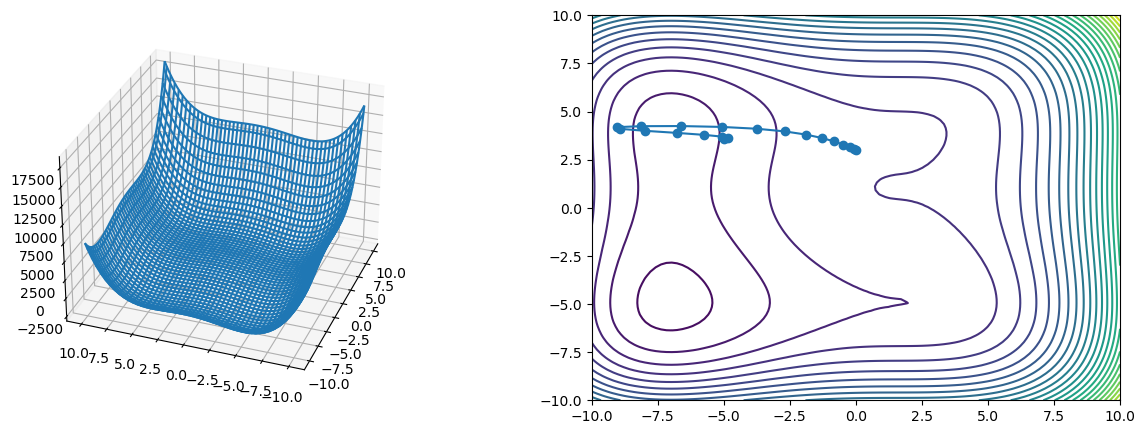

In [19]:
x = torch.tensor([1,1.2], requires_grad = True, dtype=torch.float32)

GD_momentum(g,x,.001, 20, 0.9)

x = torch.tensor([5,-3], requires_grad = True, dtype=torch.float32)

GD_momentum(g,x,.001, 20, 0.9)

x = torch.tensor([0,3], requires_grad = True, dtype=torch.float32)

GD_momentum(g,x,.001, 20, 0.9)

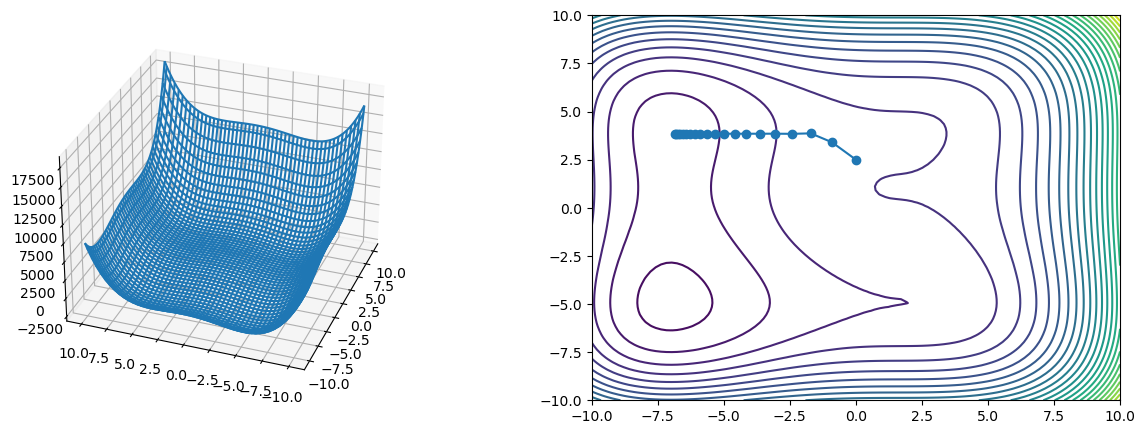

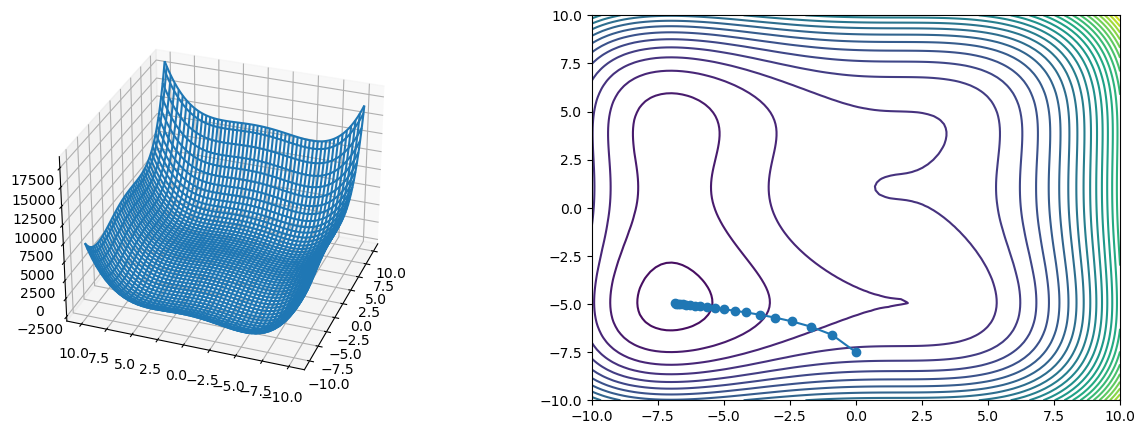

In [20]:
x = torch.tensor([0,2.5], requires_grad = True, dtype=torch.float32)

GD_AdaGrad(g,x,.9, 20)

x = torch.tensor([0,-7.5], requires_grad = True, dtype=torch.float32)

GD_AdaGrad(g,x,.9, 20)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습률은 너무 크면 빨라지지만 발산할수도 있음. 초기값은 너무 크면 발산, 너무 작으면 학습이 느림


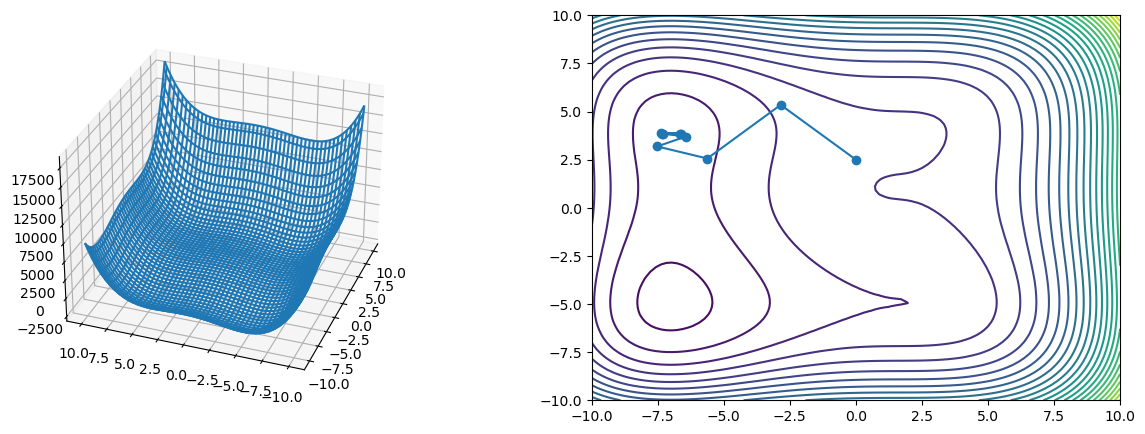

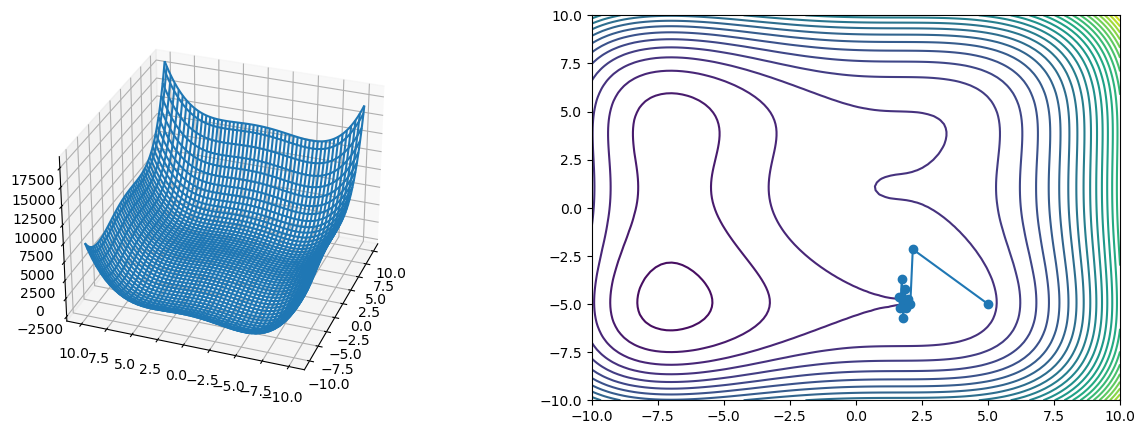

In [21]:
x = torch.tensor([0,2.5], requires_grad = True, dtype=torch.float32)

GD_RMSprop(g,x,.9, 10, 0.9)


x = torch.tensor([5,-5], requires_grad = True, dtype=torch.float32)

GD_RMSprop(g,x,.9, 10, 0.9)


 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습률이 증가하면 수렴 속도 빨르지지만 손실할수도 있음. 초기값을 변경하면 수렴 속도와 최종 손실 값이 달라짐.

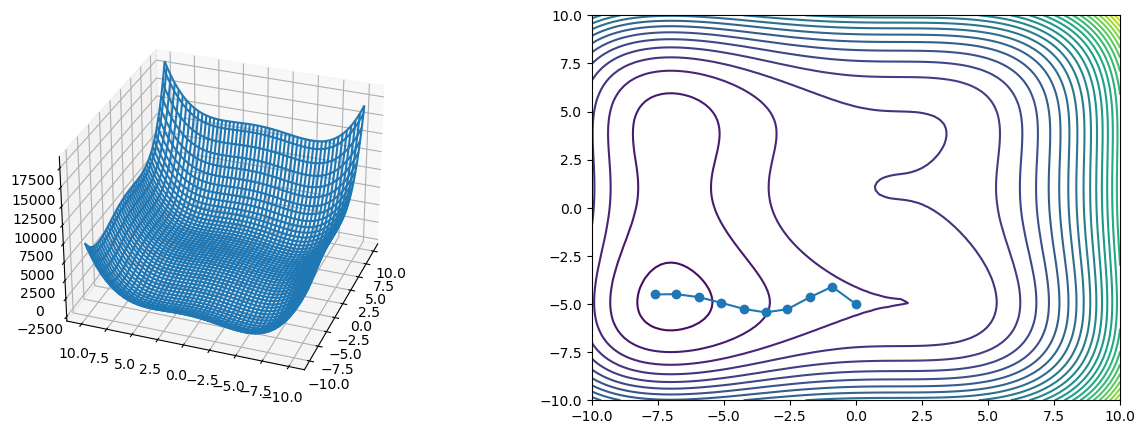

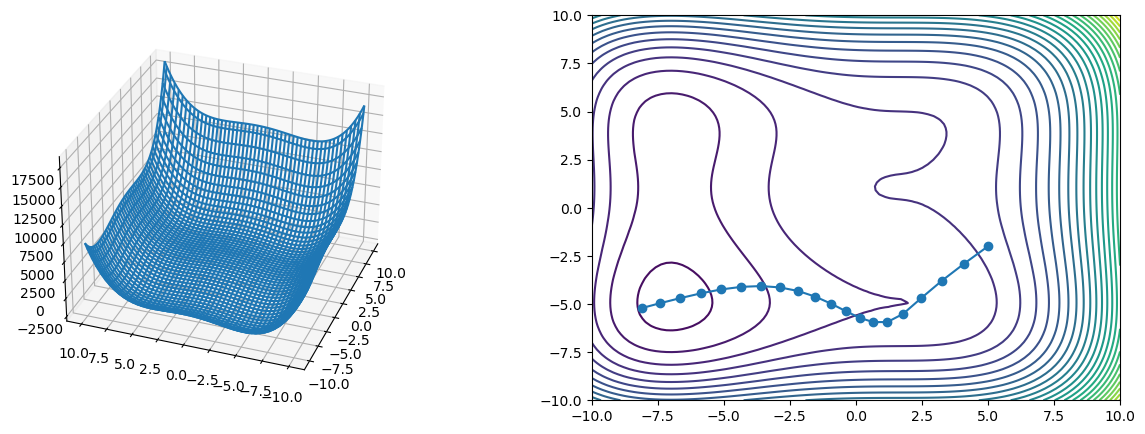

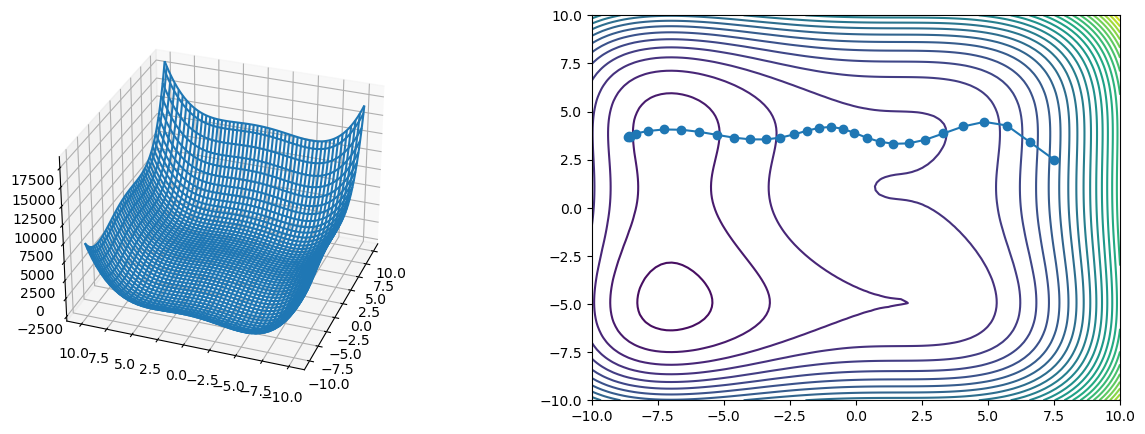

In [22]:
x = torch.tensor([0,-5], requires_grad = True, dtype=torch.float32)

GD_Adam(g,x,0.9, 10, 0.9, 0.9)


x = torch.tensor([5,-2], requires_grad = True, dtype=torch.float32)

GD_Adam(g,x,0.9, 20, 0.9, 0.9)


x = torch.tensor([7.5,2.5], requires_grad = True, dtype=torch.float32)

GD_Adam(g,x,0.9, 30, 0.9, 0.9)

 위 결과에 learning_rate와 초기값을 체계적으로 변경하여 보고 각각 무슨 영향을 미치는지 서술하세요.

정답) 학습률을 높이면 더 빠르게 학습 가능, 초기값에 따라 스텝 수가 달라진다. 초기값이 최소값에 매우 가까워서 아주 빠르게 수렴.


In [23]:
print("이서영 2020125046")

이서영 2020125046
